In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression 

import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
df_wine = pd.read_csv('./datasets_4458_8204_winequality-red.csv')

##### Functions 

###### 아웃라이어 가져오기 

In [13]:
def get_outliers(s):
    quartile_1, quartile_3 = np.percentile(s, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((s > upper_bound) | ( s < lower_bound))


###### 그래프 그리기

In [14]:
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import Binarizer 
from sklearn.model_selection import train_test_split

from functools import reduce
import pandas as pd
def draw_curves(confusion_matrix_list, f1_score_list):
    TN_list = []
    FP_list = []
    FN_list = []
    TP_list = []
    FPR_list = []
    TPR_list = []
    accuracy_list = []
    precision_list = []
    threshold_list = []
    recall_list = []
    for threshold, elements in confusion_matrix_list.items():
        TN, FP, FN, TP = elements
        a, b, c, d = TN, FP, FN, TP
        TN_list.append(a / 50)
        FP_list.append(b / 50)
        FN_list.append(c / 50)
        TP_list.append(d / 50)
        
        
#         if threshold >= 0.7:
#             break
        accuracy = (TN + TP) / (TN + FP + FN + TP)
        precision = TP / (TP + FP)
        recall = TP / (FN + TP)
        
        FPR = 1 - (TN / (TN+FP) )
        
        TPR_list.append(recall)
        FPR_list.append(FPR)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        threshold_list.append(threshold)
        
    plt.figure(figsize = (10,10))
    plt.plot(threshold_list, accuracy_list, linestyle = ':', label = 'accuracy')
    plt.plot(threshold_list, precision_list, linestyle = '-', linewidth = 2, label = 'precision')
    plt.plot(threshold_list, recall_list, linestyle = '-', linewidth = 2, label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()
    
    plt.figure(figsize = (10,10))
    plt.plot(threshold_list, FN_list, linestyle = '--', label = 'FN')
    plt.plot(threshold_list, TP_list, linestyle = '-.', label = 'TP') 
    plt.plot(threshold_list, f1_score_list, linestyle = '-', linewidth=2, label = 'F1_Score' )
    plt.xlabel('Threshold')
    plt.legend()
    
    plt.figure(figsize = (10,10))
    plt.plot(recall_list, precision_list)
    plt.title('PR Curve')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    
    plt.figure(figsize = (10,10))
    plt.plot(FPR_list, TPR_list)
    plt.plot([0,1], [0,max(TPR_list)], ':')
    plt.title('ROC Curve')
    plt.xlabel('FPR');plt.ylabel('TPR')

     

# 오차 행렬 내부 원소들 값을 1차원 배열로 넘겨줌 
def get_confusion_elements(confusion):
    return reduce(lambda x,y : x + y, confusion)


# 오차행렬과, f1스코어 리스트 반환 
def get_eval_by_threshold(y_test, pred_proba, n = 30):
    confusion_matrix_list = dict()
    f1_score_list = []
    for i in range(1,n):
        my_threshold = i/50
        binarizer = Binarizer(my_threshold)
        binarizer.fit(pred_proba)
        my_predict = binarizer.transform(pred_proba)
        print('Threshold', my_threshold)
        confusion, f1 = get_clf_score(y_test, my_predict)
        confusion_elements = get_confusion_elements(confusion.tolist())
#         print('TN, FP, FN, TP : ', confusion_elements)
        print('오차 행렬')
        print(confusion)
        print('=========================')
        
        f1_score_list.append(f1)
        confusion_matrix_list[my_threshold] = confusion_elements
    return confusion_matrix_list, f1_score_list
        

        
def get_clf_score(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
#     print('정확도: {:.4f}'.format(accuracy))
#     print('정밀도: {:.4f}'.format(precision))
#     print('재현율: {:.4f}'.format(recall))
#     print('F1 스코어: {:.4f}'.format(f1))
    return confusion, f1 

# 변수 이해하기 
- 결합산(fixed acid) : 주로 타르타르산(tartaric),사과산(malic)으로 이루어져 있고 와인의 산도를 제어 한다.
- 휘발산(volatile acidity) : 와인의 향에 연관이 많다.
- 구연산(citric acid) : 와인의 신선함을 올려주는 역할, 산성화에 연관을 미친다
- 잔여 설탕(residual sugar) : 와인의 단맛을 올려준다.
- 염화물(chlorides) : 와인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
- 황 화합물 : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 (free sulfur dioxide, total sulfur, dioxide sulphates)
- free sulfur : 원래 있는 것
- total sulfur : 나중에 추가한 것 더한 것 
- 밀도(density) : 바디의 높고 낮음을 표현하는 와인의 무게감을 의미한다. 산성도(pH) : 와인의 신맛의 정도를 나타낸다.
- 알코올(alcohol) : 와인의 과 단맛을 주며 와인의 바디감에 영향을 준다.

# 문제이해하기
- 좋은 와인 : quality > 6.5

# EDA

In [15]:
df_wine.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
###### 데이터 형태 확인 
# 실수형 데이터 
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
###### 결측치 확인 
# 결측치 없음 
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df_wine['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

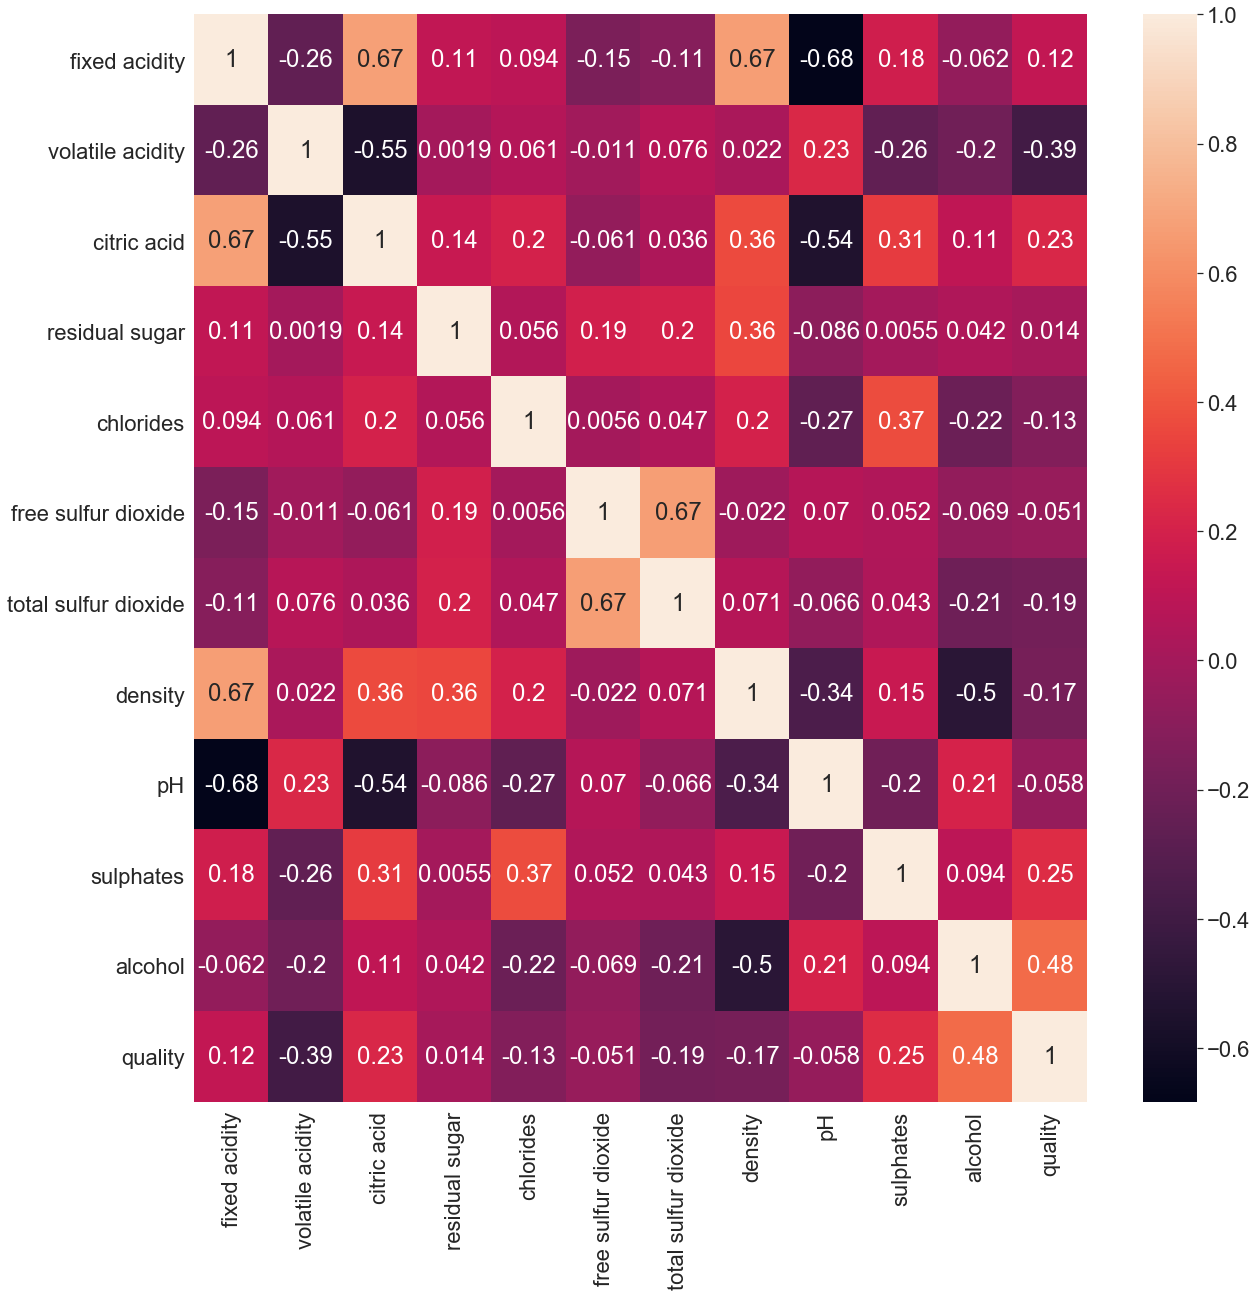

In [19]:
plt.figure(figsize = (20,20))
sns.set(font_scale = 2)
sns.heatmap(df_wine.corr(), annot=True)

# 이상치 확인  - boxplot 

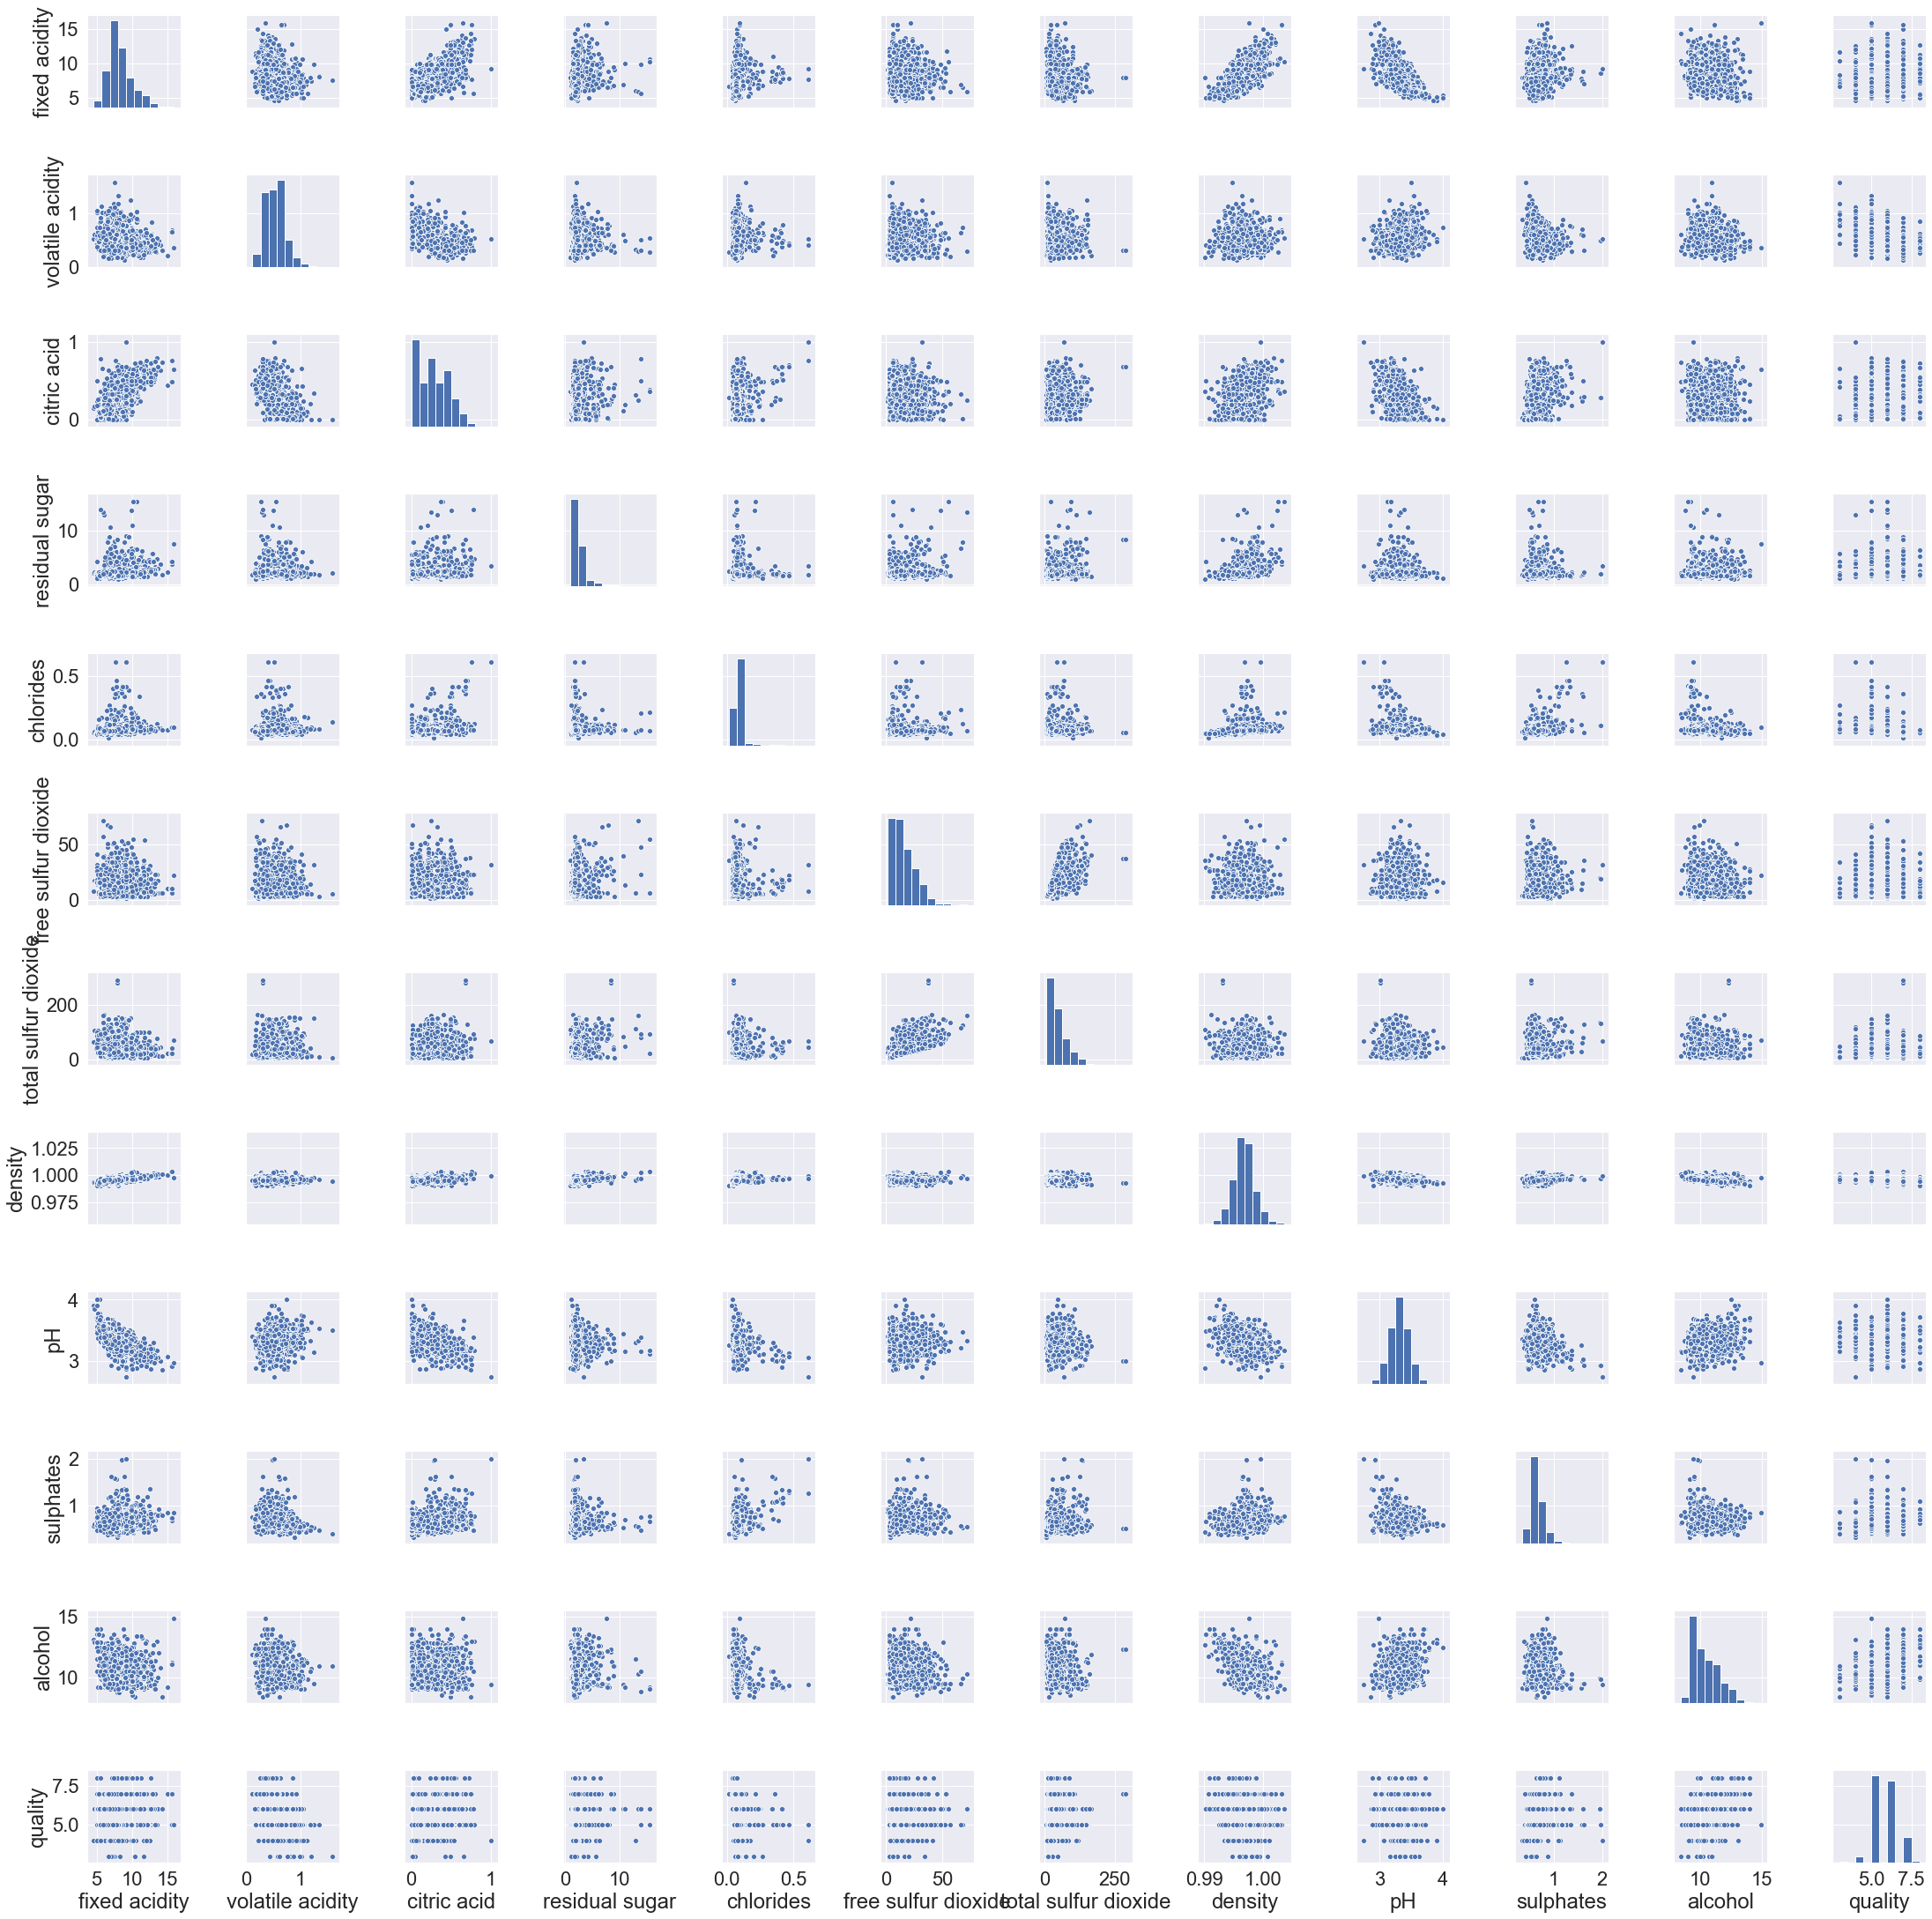

In [20]:
sns.pairplot(df_wine)

In [21]:
# Eleminate elements out of IQR Upper, Lower bounds 

original_length = 1599

df_test = pd.DataFrame(df_wine)

print(id(df_test))
print(id(df_wine))
outlier_list = set()
for col in df_wine.columns:
    outlier_indice = set(*get_outliers(df_wine[col]))
    outlier_list.update(outlier_indice)

outlier_list = list(outlier_list)
print(outlier_list, '\nlen : ', len(outlier_list))
df_test.drop(outlier_list, inplace = True)

modified_length = len(df_test)
print(original_length - modified_length, 'lines have been deleted. \n\n')
df_test.info()

140296122271120
140296016386896
[1032, 9, 11, 13, 14, 15, 1038, 17, 18, 1043, 19, 1051, 1056, 33, 1057, 35, 1059, 1061, 38, 39, 40, 42, 43, 45, 1071, 1074, 1075, 1077, 1078, 55, 1079, 57, 1081, 1086, 64, 65, 1090, 1094, 1096, 1098, 79, 81, 83, 1109, 86, 1111, 88, 1114, 90, 91, 92, 94, 95, 1120, 1122, 1126, 106, 1131, 1132, 1133, 109, 1138, 120, 1146, 1147, 125, 126, 127, 1154, 130, 1156, 134, 1158, 1165, 142, 144, 145, 147, 151, 1176, 1175, 154, 155, 156, 157, 161, 1186, 163, 164, 1190, 1191, 169, 1193, 1202, 1203, 181, 1207, 188, 189, 190, 192, 1217, 1220, 1221, 199, 1224, 201, 1226, 1228, 205, 206, 1231, 210, 1235, 215, 1239, 219, 1244, 226, 1252, 1256, 1257, 1258, 1259, 1260, 1261, 240, 243, 244, 1269, 1270, 1276, 258, 264, 1288, 1289, 267, 268, 269, 270, 271, 272, 1295, 274, 1299, 275, 1296, 277, 278, 279, 281, 1298, 283, 1307, 276, 1312, 291, 1316, 294, 1319, 1321, 303, 1331, 307, 308, 1334, 313, 324, 325, 326, 327, 328, 330, 331, 1358, 335, 338, 339, 340, 1367, 1370, 347, 1371, 1

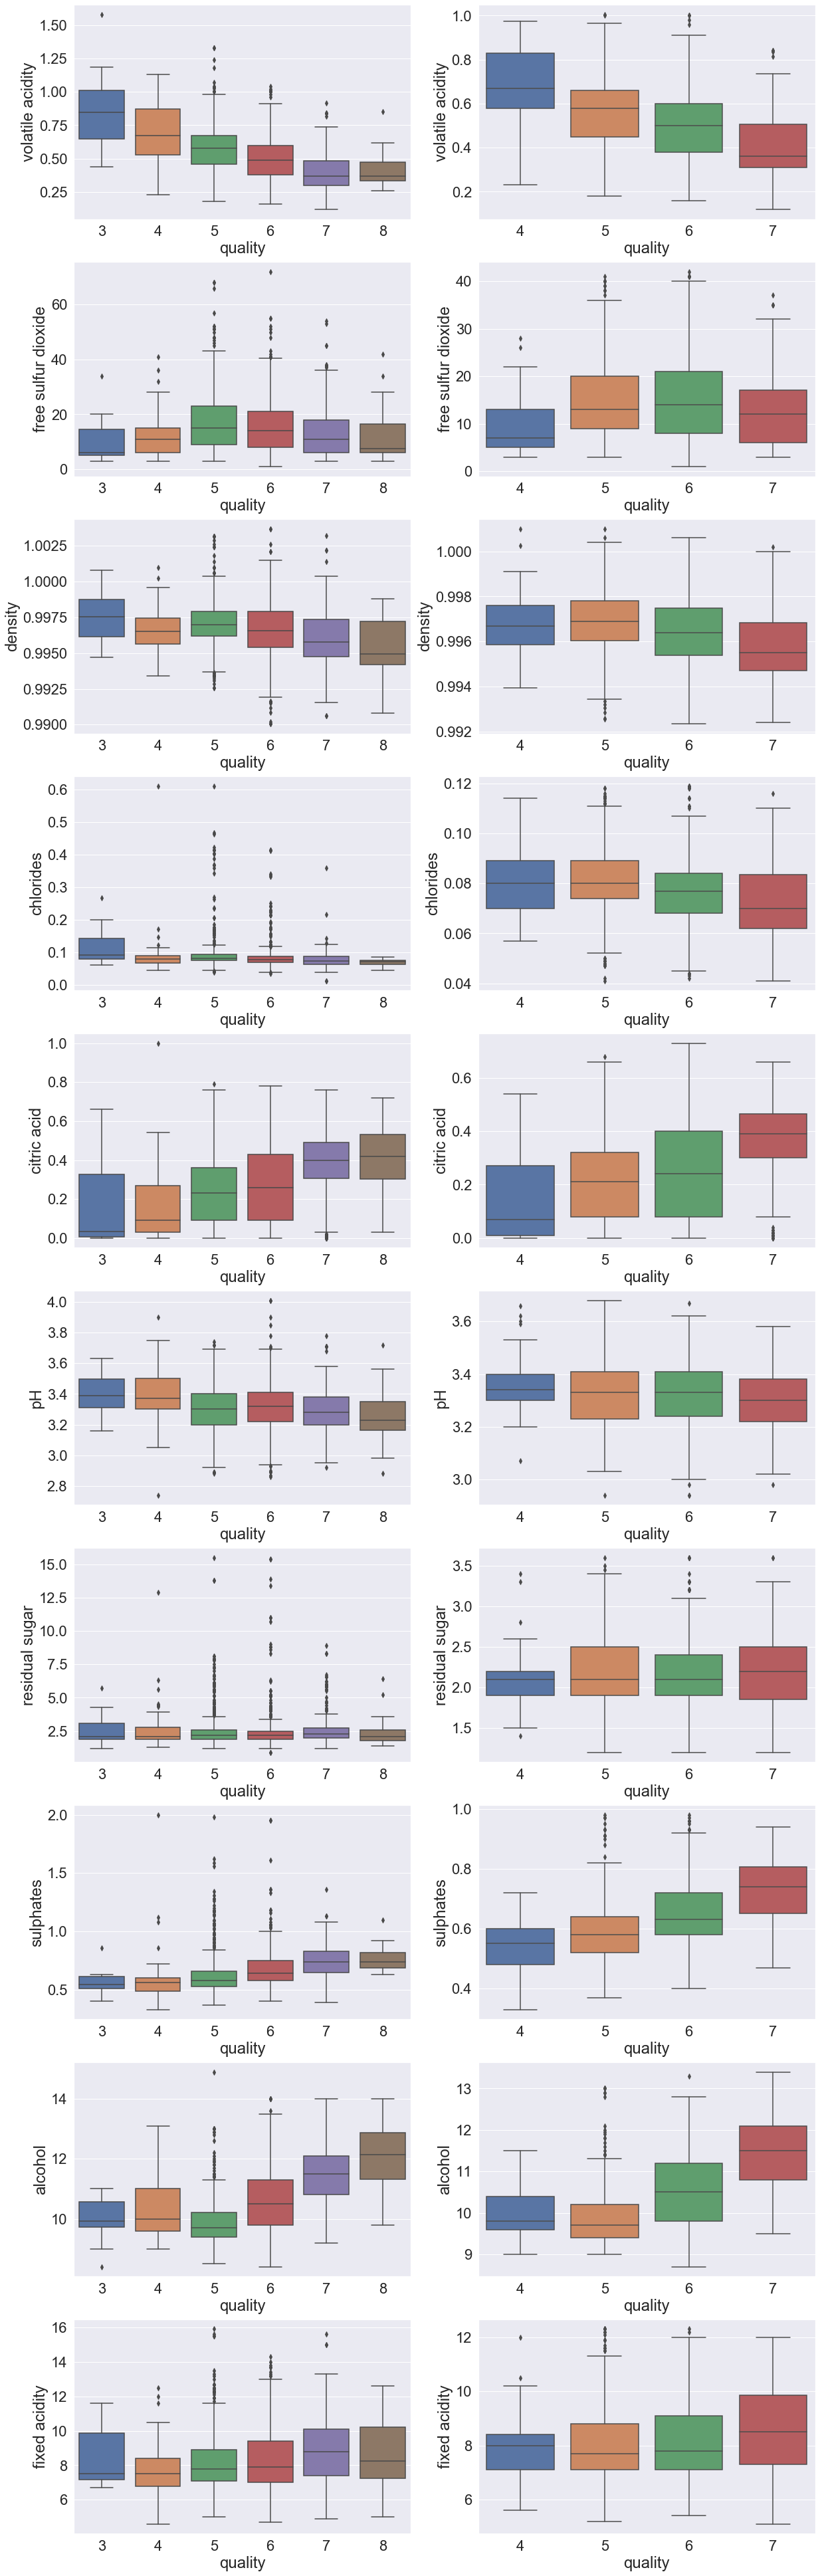

In [22]:
plt.figure(figsize = (20,70))

plt.subplot(10,2,1)
sns.boxplot(data = df_wine, x='quality', y='volatile acidity')

plt.subplot(10,2,2)
sns.boxplot(data = df_test, x='quality', y='volatile acidity')

plt.subplot(10,2,3)
sns.boxplot(data = df_wine, x='quality', y='free sulfur dioxide')

plt.subplot(10,2,4)
sns.boxplot(data = df_test, x='quality', y='free sulfur dioxide')

plt.subplot(10,2,5)
sns.boxplot(data = df_wine, x='quality', y='density')

plt.subplot(10,2,6)
sns.boxplot(data = df_test, x='quality', y='density')

plt.subplot(10,2,7)
sns.boxplot(data = df_wine, x='quality', y='chlorides')

plt.subplot(10,2,8)
sns.boxplot(data = df_test, x='quality', y='chlorides')

plt.subplot(10,2,9)
sns.boxplot(data = df_wine, x='quality', y='citric acid')

plt.subplot(10,2,10)
sns.boxplot(data = df_test, x='quality', y='citric acid')

plt.subplot(10,2,11)
sns.boxplot(data = df_wine, x='quality', y='pH')

plt.subplot(10,2,12)
sns.boxplot(data = df_test, x='quality', y='pH')

plt.subplot(10,2,13)
sns.boxplot(data = df_wine, x='quality', y='residual sugar')

plt.subplot(10,2,14)
sns.boxplot(data = df_test, x='quality', y='residual sugar')

plt.subplot(10,2,15)
sns.boxplot(data = df_wine, x='quality', y='sulphates')

plt.subplot(10,2,16)
sns.boxplot(data = df_test, x='quality', y='sulphates')

plt.subplot(10,2,17)
sns.boxplot(data = df_wine, x='quality', y='alcohol')

plt.subplot(10,2,18)
sns.boxplot(data = df_test, x='quality', y='alcohol')

plt.subplot(10,2,19)
sns.boxplot(data = df_wine, x='quality', y='fixed acidity')

plt.subplot(10,2,20)
sns.boxplot(data = df_test, x='quality', y='fixed acidity')

### features that have patterns towards Quality 
# Volatile Acidity 
# critic acids
# sulphate( ? )
# alcohol 

### features that still have abundant outliers 
# chlorides
# residual sugar
# sulphate( ? )

### No patterns found in
# free sulfur dioxides 
# density 
# pH 

In [23]:
df_wine = pd.DataFrame(df_test)

# 이상치 제거후 상관관계 다시 확인 

# 음... 아랫것들을 한 번 유심히 봐야겠군
- volatile acidity   -0.390558
- citric acid         0.226373
- sulphates           0.251397
- alcohol             0.476166

In [24]:
print(df_wine.corr()[df_wine.corr()['quality'] > 0.2]['quality'])

citric acid    0.212133
sulphates      0.413533
alcohol        0.492551
quality        1.000000
Name: quality, dtype: float64


In [25]:
print(df_wine.corr()[df_wine.corr()['quality'] < -0.2]['quality'])

volatile acidity       -0.346962
total sulfur dioxide   -0.203374
density                -0.215375
Name: quality, dtype: float64


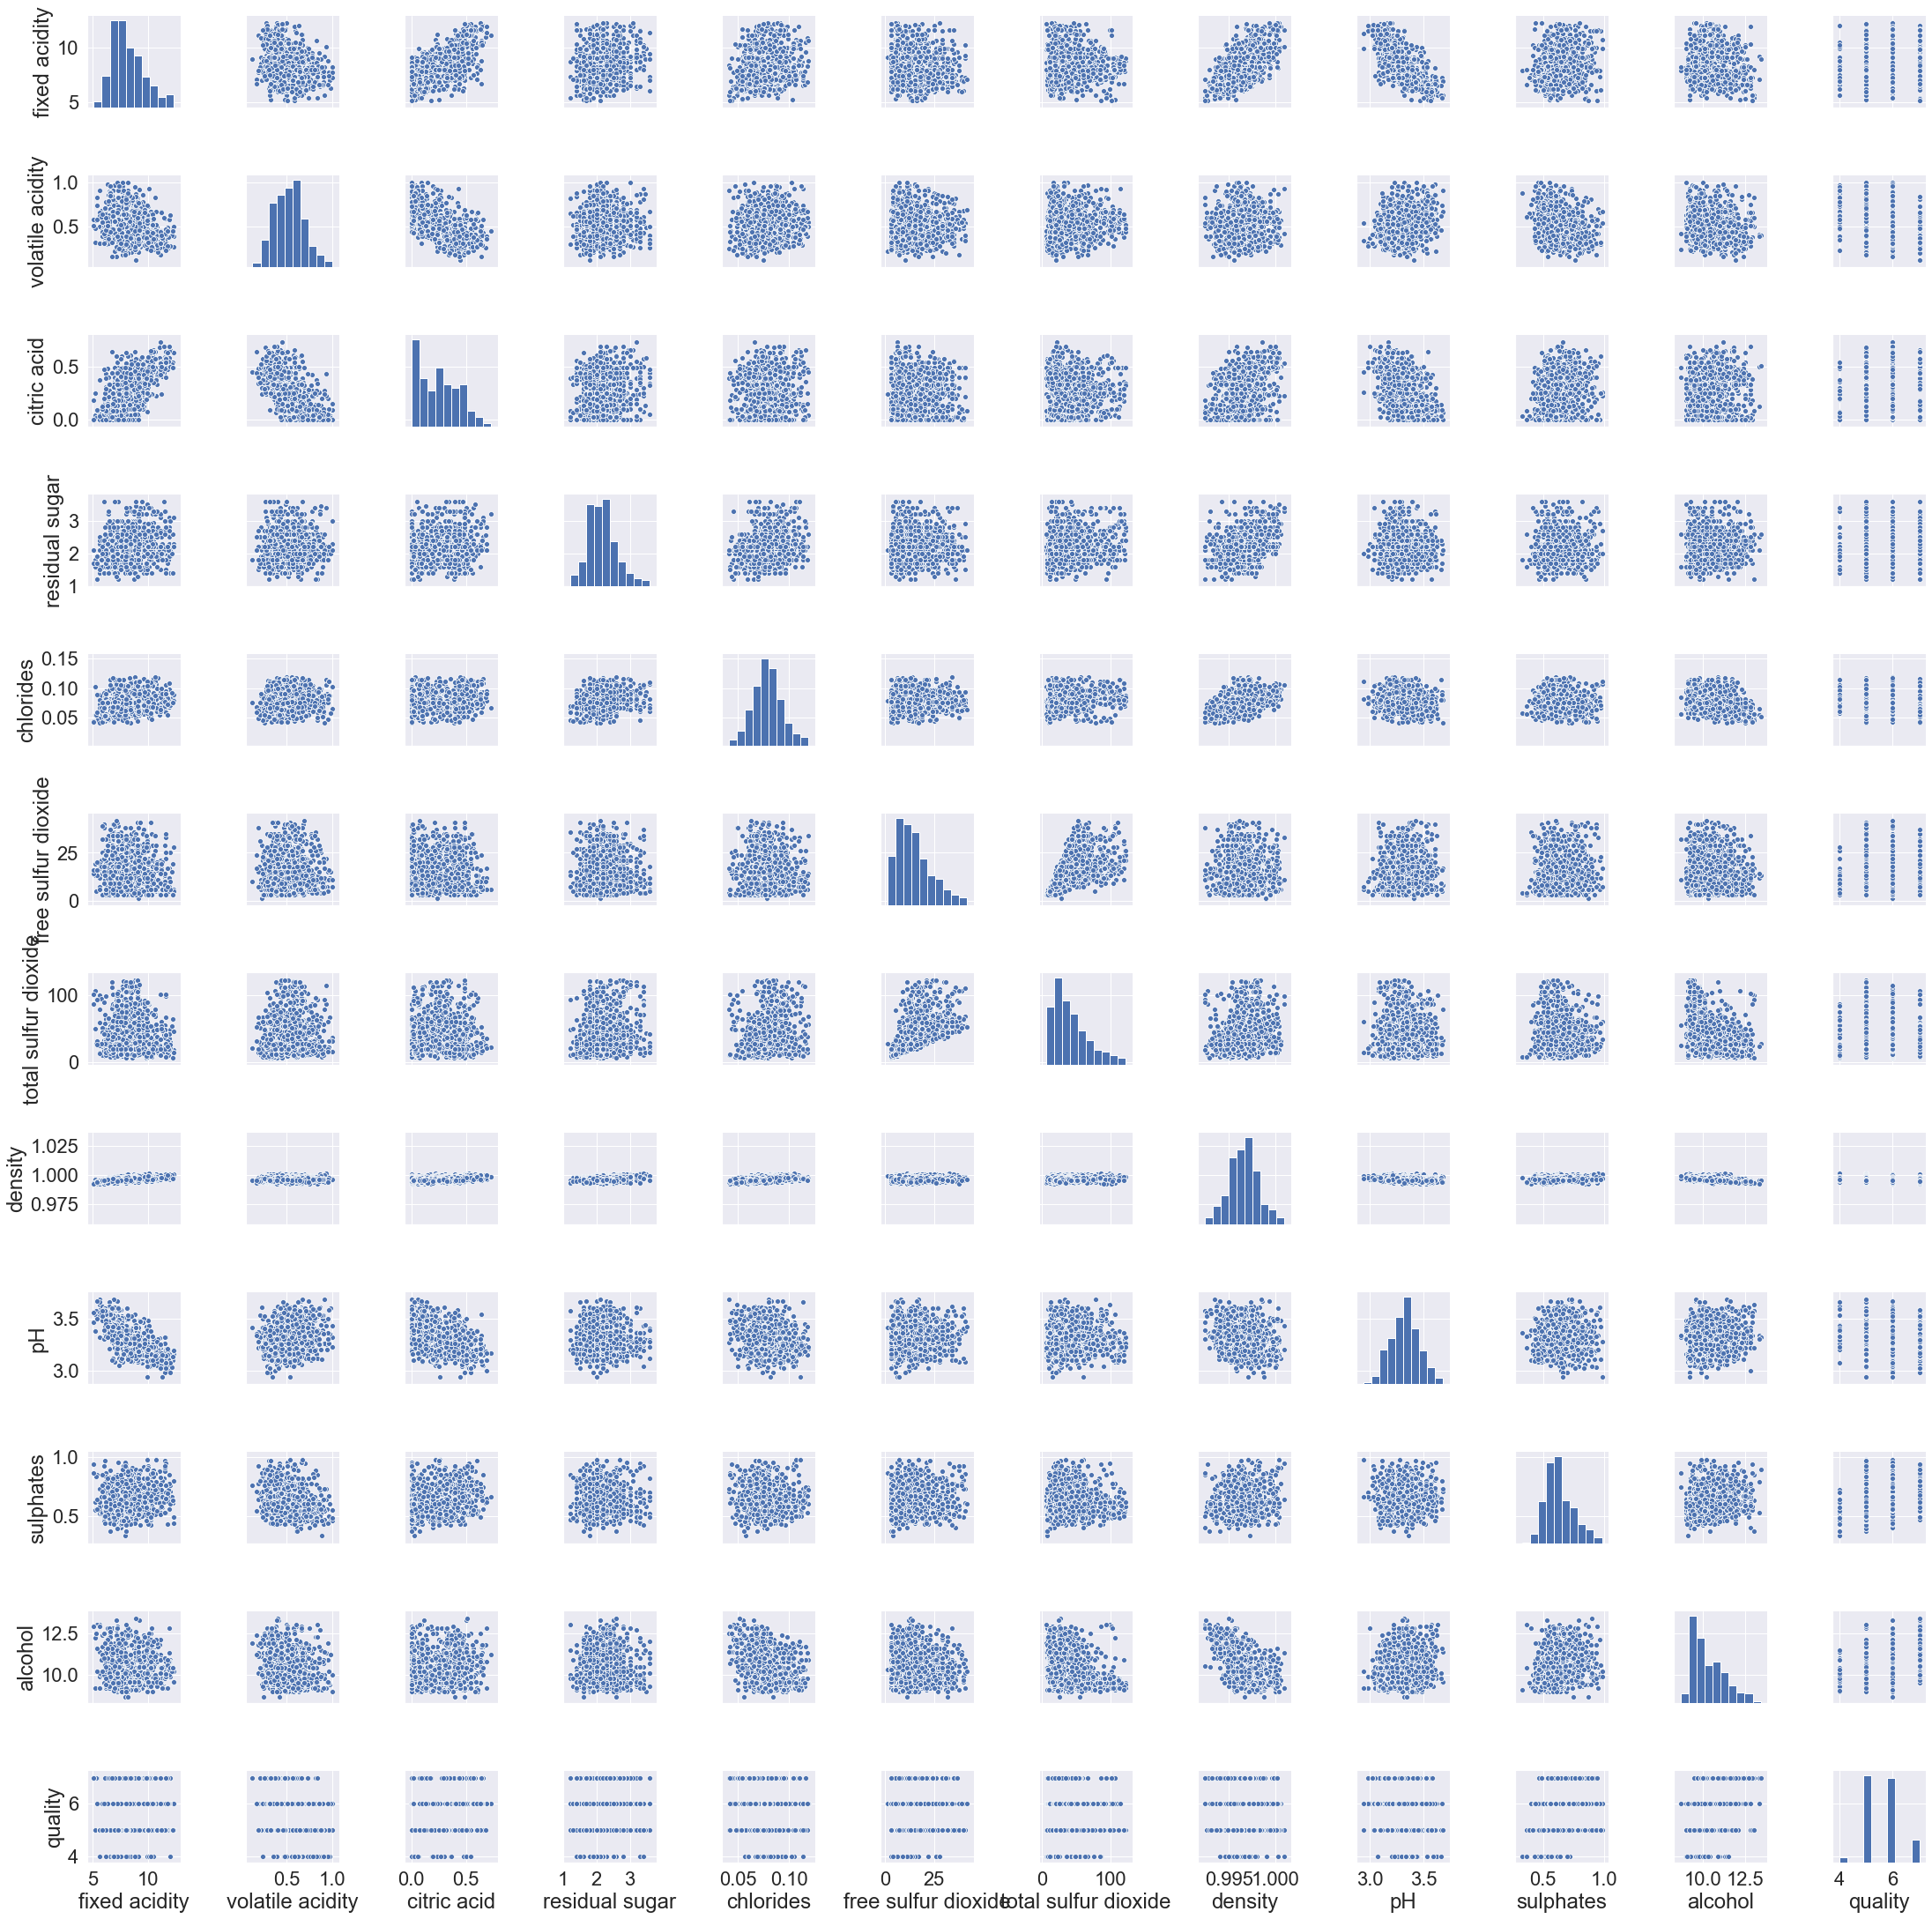

In [26]:
sns.pairplot(df_wine)

# volatile acidity / citric acid / sulphates / alcohol & quality
- citric acid    0.226373 - 산성화 
- sulphates      0.251397 - 와인보관 - 산성화랑 연관이 있다
- alcohol        0.476166 - 단맛
- volatile acidity   -0.390558 - 와인의 향

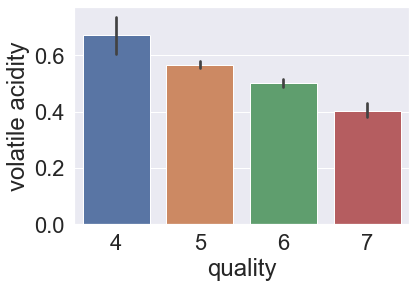

In [27]:
sns.barplot(data = df_wine, x = 'quality', y = 'volatile acidity')

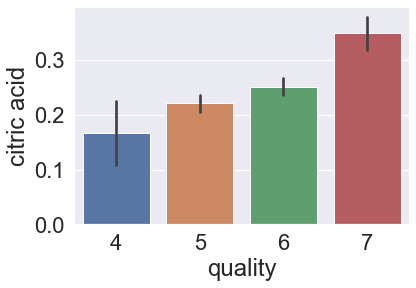

In [28]:
sns.barplot(data = df_wine, x = 'quality', y = 'citric acid')

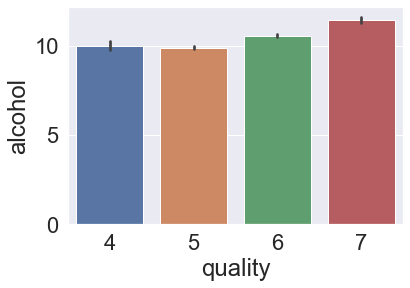

In [29]:
sns.barplot(data = df_wine, x = 'quality', y = 'alcohol')

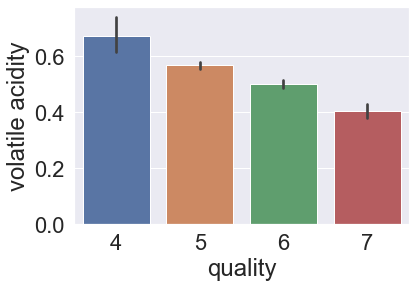

In [30]:
sns.barplot(data = df_wine, x = 'quality', y = 'volatile acidity')

# 너네들끼리 노는구나?
- 참고 : https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/

In [31]:
import random
import numpy as np
random_index = [random.randint(1,1000) for _ in range(300)]

In [32]:
acids = ['pH', 'fixed acidity', 'citric acid', 'volatile acidity', 'sulphates', 'density', 'quality']
acid_relationship = df_wine.iloc[random_index,:][acids]
acid_relationship.corr()

pH  fixed acidity  citric acid  volatile acidity  \
pH                1.000000      -0.668194    -0.493338          0.241297   
fixed acidity    -0.668194       1.000000     0.678775         -0.302301   
citric acid      -0.493338       0.678775     1.000000         -0.659048   
volatile acidity  0.241297      -0.302301    -0.659048          1.000000   
sulphates         0.100185       0.197971     0.244652         -0.281528   
density          -0.083254       0.537213     0.257648          0.054867   
quality          -0.136210       0.185714     0.250974         -0.430303   

                  sulphates   density   quality  
pH                 0.100185 -0.083254 -0.136210  
fixed acidity      0.197971  0.537213  0.185714  
citric acid        0.244652  0.257648  0.250974  
volatile acidity  -0.281528  0.054867 -0.430303  
sulphates          1.000000  0.166492  0.452154  
density            0.166492  1.000000 -0.223385  
quality            0.452154 -0.223385  1.000000

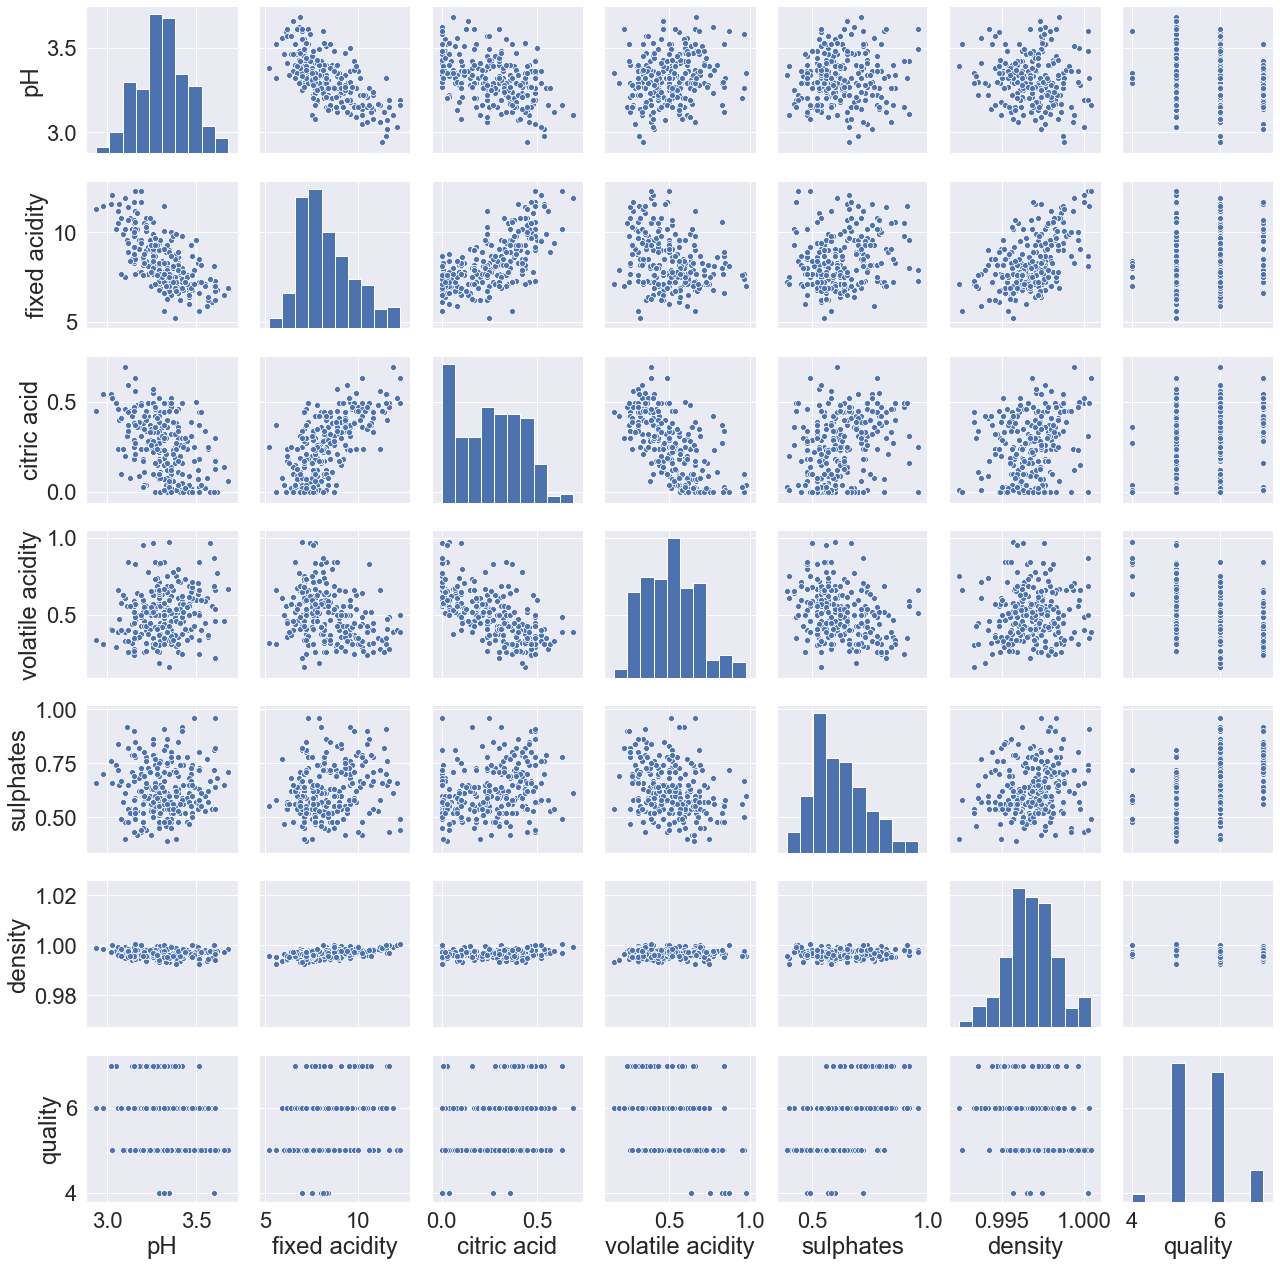

In [33]:
sns.pairplot(acid_relationship)

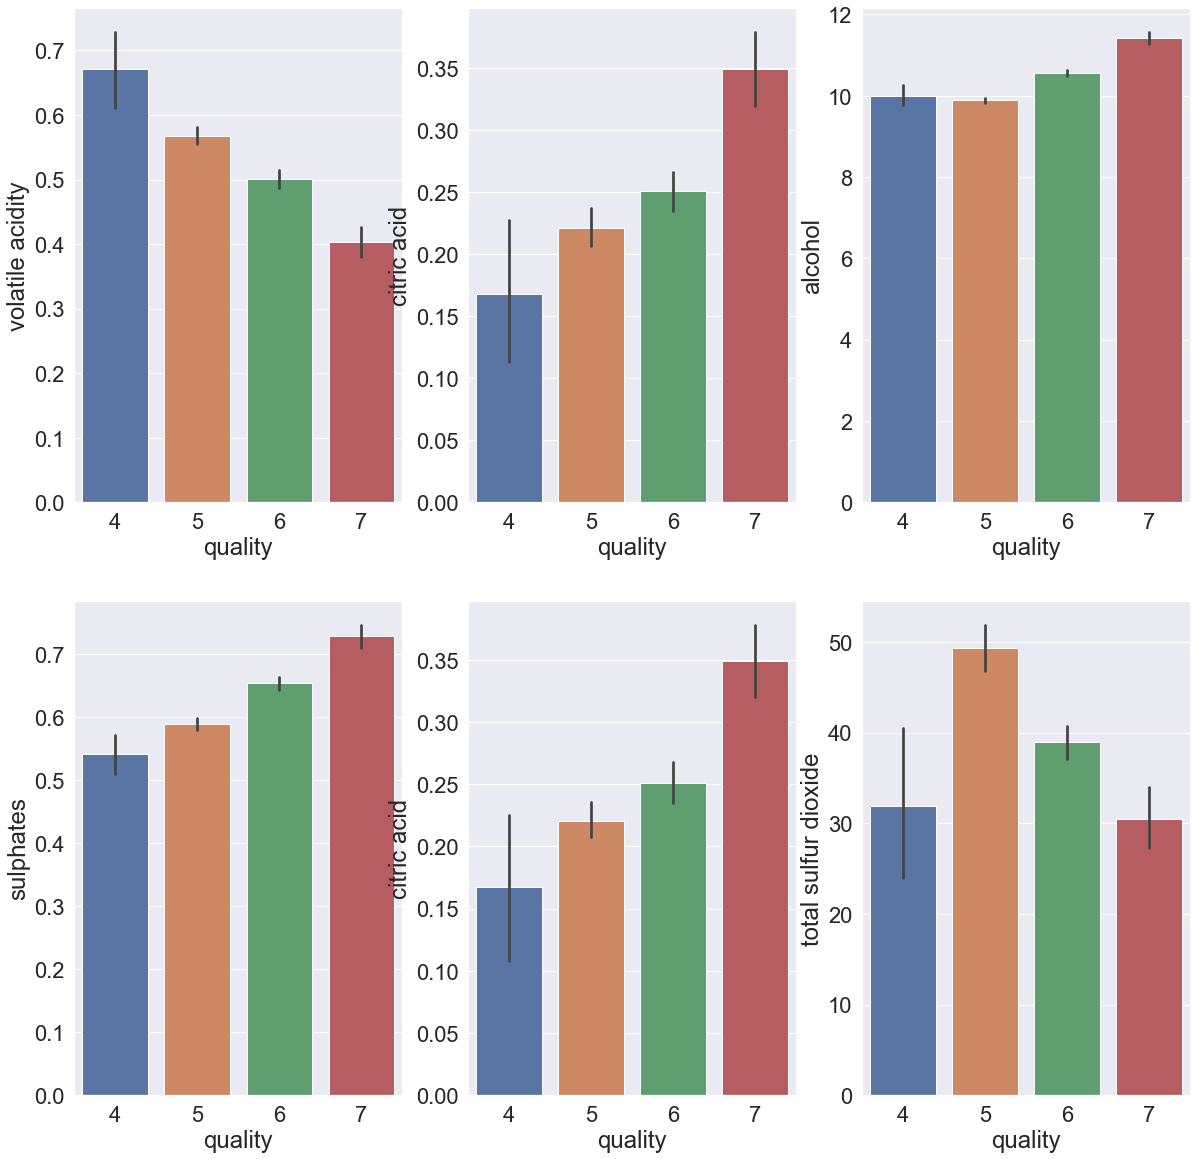

In [34]:
plt.figure(figsize = (20,20))
plt.subplot(231)
sns.barplot(data=df_wine, y='volatile acidity', x='quality')
plt.subplot(232)
sns.barplot(data=df_wine, y='citric acid', x='quality')
plt.subplot(233)
sns.barplot(data=df_wine, y='alcohol', x='quality')
plt.subplot(234)
sns.barplot(data=df_wine, y='sulphates', x='quality')
plt.subplot(235)
sns.barplot(data=df_wine, y='citric acid', x='quality')
plt.subplot(236)
sns.barplot(data=df_wine, y='total sulfur dioxide', x='quality')

# 아래의 종속 변수들은 서로 연관이 있는 변수로 판단이 되고, Quality에 영향을 주는 변수는 citric acid로 판단 
산성
- Volatile acidity와 citric acid 반비례 작용 
- citric acid와 

삭제 
- density, residual sugar
- fixed acidity
- pH
- free sulfur dioxide
- total sulfur dioxide 

# 드랍 : 'density', 'residual sugar', 'fixed acidity', 'pH', 'free sulfur dioxide', 'total sulfur dioxide'

In [35]:
df_wine.drop(['density', 'residual sugar', 'fixed acidity', 'pH', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1, inplace = True)

In [36]:
df_wine.head()

volatile acidity  citric acid  chlorides  sulphates  alcohol  quality
0              0.70         0.00      0.076       0.56      9.4        5
1              0.88         0.00      0.098       0.68      9.8        5
2              0.76         0.04      0.092       0.65      9.8        5
3              0.28         0.56      0.075       0.58      9.8        6
4              0.70         0.00      0.076       0.56      9.4        5

# 다시 한번 히트맵을 통해 연관관계를 보자

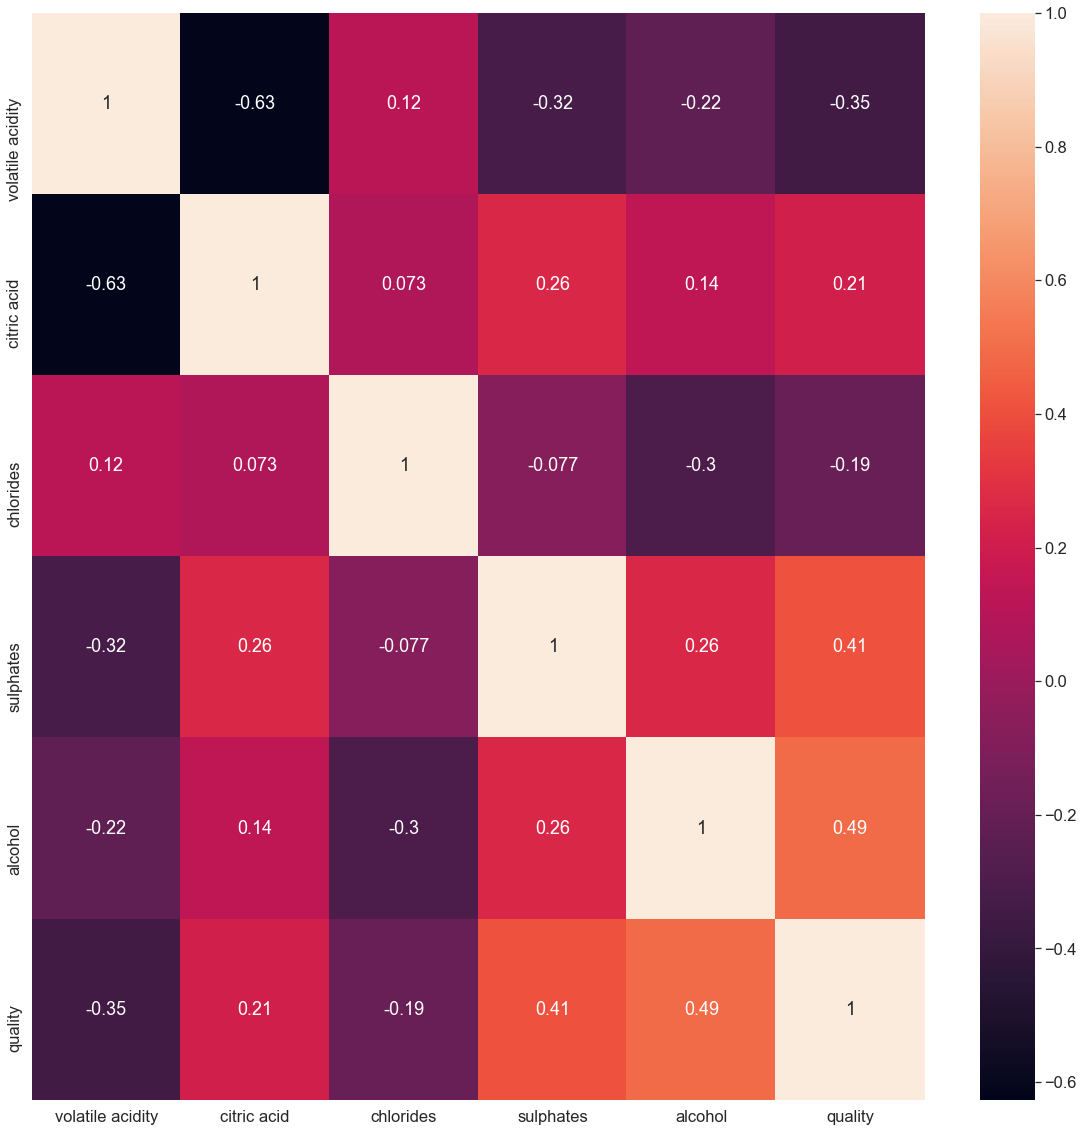

In [37]:
plt.figure(figsize = (20,20))
sns.set(font_scale = 1.5)
sns.heatmap(df_wine.corr(), annot = True)

각 변수들 간의 상관관계는 상당히 줄어들었고 volatile acidity의 경우,   
quality와도 큰 상관계수를 가지기 때문에 드랍하기에는 애로사항이 있음

# 랜덤 포레스트 실행 

In [38]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [39]:
bins = [0, 6, 10]
labels = [0,1]
df_wine['quality'] = pd.cut(df_wine['quality'], bins=bins, labels = labels)
df_wine['quality'].value_counts()

0    1044
1     135
Name: quality, dtype: int64

###### 데이터 분리 

In [40]:
X_wine = df_wine.drop('quality', axis = 1)
y_wine = df_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, \
                                                   test_size = 0.2, random_state = 0) 

###### 하이퍼파라미터 튜닝 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix 

params = {
    'n_estimators':[100,300,500,700,900,1100,1300],
    # 100, 300, 500 넣어서 최적의 파라미터를 갖는 r_clf 가져오기 
    'max_depth' : [6, 8, 10, 12, 14, 16, 18, 20, 30], 
    'min_samples_leaf' : [8, 12, 18, 24, 30],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print(' 최적 하이퍼 파라미터 : ', grid_cv.best_params_)
print(' 최고 예측 정확도 : ', grid_cv.best_score_)

In [50]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)
pred = rf_clf_best.predict(X_test)

pred_proba = rf_clf_best.predict_proba(X_test)


print('정확도 :{:.4f}'.format( accuracy_score(y_test, pred) ))
print('f1 점수 : {:.4f} '.format(f1_score(y_test, pred)) )
print('roc_auc : {:.4f}'.format(roc_auc_score(y_test, pred)))
print('confusion matrix : \n', confusion_matrix(y_test, pred))

정확도 :0.8771
f1 점수 : 0.2162 
roc_auc : 0.5596
confusion matrix : 
 [[203   2]
 [ 27   4]]


Threshold 0.02
오차 행렬
[[ 78 127]
 [  3  28]]
Threshold 0.04
오차 행렬
[[117  88]
 [  4  27]]
Threshold 0.06
오차 행렬
[[130  75]
 [  4  27]]
Threshold 0.08
오차 행렬
[[139  66]
 [  6  25]]
Threshold 0.1
오차 행렬
[[145  60]
 [  6  25]]
Threshold 0.12
오차 행렬
[[152  53]
 [  6  25]]
Threshold 0.14
오차 행렬
[[158  47]
 [  6  25]]
Threshold 0.16
오차 행렬
[[162  43]
 [  8  23]]
Threshold 0.18
오차 행렬
[[165  40]
 [  8  23]]
Threshold 0.2
오차 행렬
[[173  32]
 [  9  22]]
Threshold 0.22
오차 행렬
[[176  29]
 [  9  22]]
Threshold 0.24
오차 행렬
[[176  29]
 [  9  22]]
Threshold 0.26
오차 행렬
[[178  27]
 [ 11  20]]
Threshold 0.28
오차 행렬
[[181  24]
 [ 13  18]]
Threshold 0.3
오차 행렬
[[182  23]
 [ 16  15]]
Threshold 0.32
오차 행렬
[[185  20]
 [ 18  13]]
Threshold 0.34
오차 행렬
[[188  17]
 [ 18  13]]
Threshold 0.36
오차 행렬
[[191  14]
 [ 20  11]]
Threshold 0.38
오차 행렬
[[194  11]
 [ 21  10]]
Threshold 0.4
오차 행렬
[[199   6]
 [ 23   8]]
Threshold 0.42
오차 행렬
[[201   4]
 [ 23   8]]
Threshold 0.44
오차 행렬
[[203   2]
 [ 24   7]]
Threshold 0.46
오차 행렬
[[203   2]
 [ 2

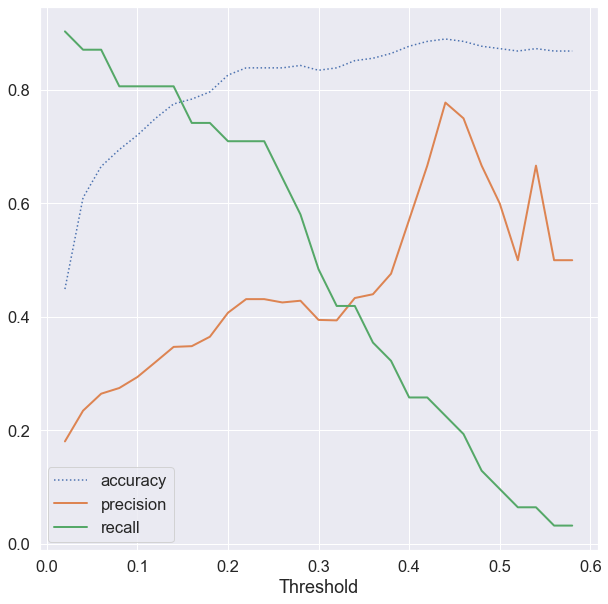

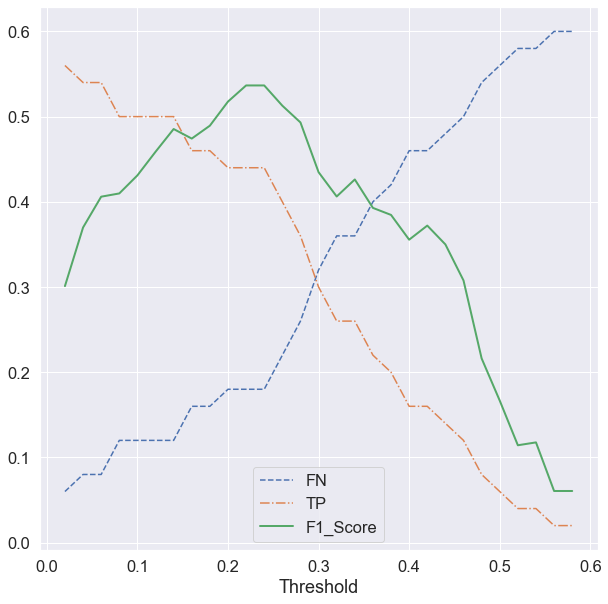

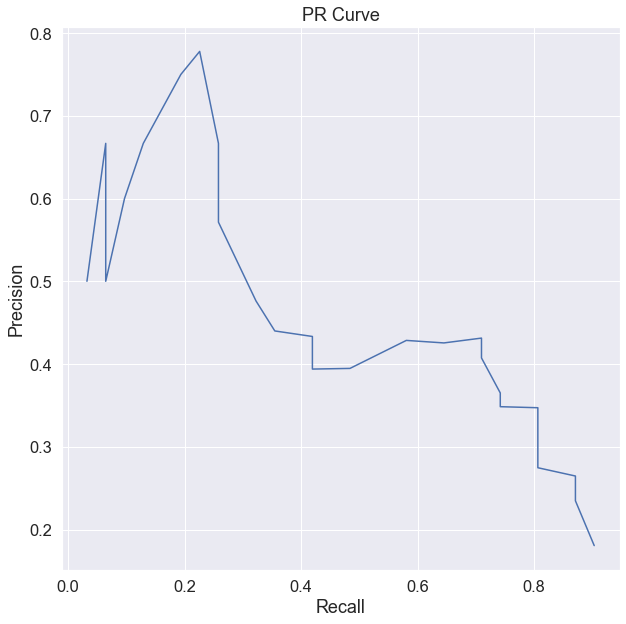

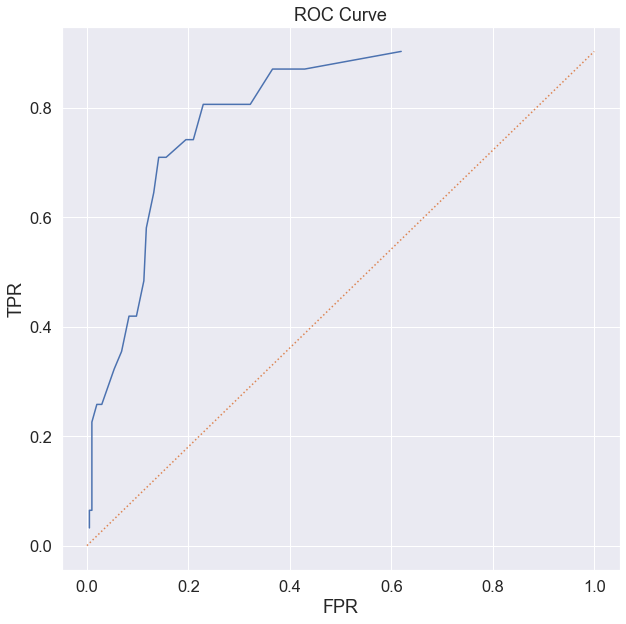

In [43]:
# 그림을 그리기위해 각 threshold와 오차행렬을 가져옴
confusion_matrix_list, f1_score_list = get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1))
draw_curves(confusion_matrix_list, f1_score_list)

alcohol             0.327176
sulphates           0.260642
volatile acidity    0.177094
chlorides           0.121923
citric acid         0.113165
dtype: float64


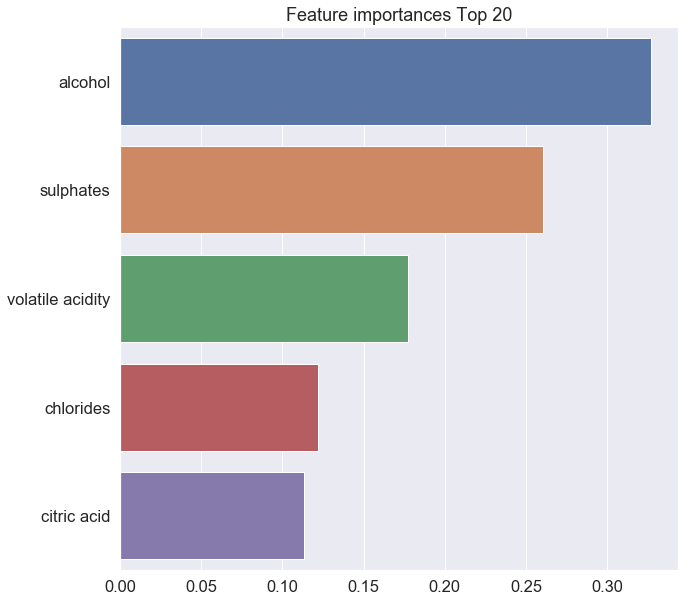

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# random forest classifier에서 중요하게 평가된 
ftr_importances_values = rf_clf_best.feature_importances_ 

ftr_importances = pd.Series(ftr_importances_values, \
                                        index = X_train.columns )

# 중요도 높은 파일들에서 상위 20개의 데이터만 가져옴 
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] 

# ftr_importances 데이터셋 확인 
print(ftr_importances.sort_values(ascending = False)[:10])

# 시각화 
plt.figure(figsize = (10,10))
plt.title("Feature importances Top 20")
sns.barplot(x = ftr_top20, y = ftr_top20.index)